# Exploratory Data Analysis

Here will will explore various views of our Yelp_Api data in order to discover insights about our two food types in each region.

To begin, we import the CSV file we saved from the previous yelp_api script.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from scipy import stats
import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.figure_factory as ff

In [2]:
df = pd.read_csv("yelp_master_data.csv")

In [3]:
df.describe()

,Unnamed: 0,price,rating,review_count,latitude,longitude
count,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000
mean,61.787006,2.208608,3.919960,355.938379,38.154668,-93.650242
std,60.992420,0.787000,0.613294,521.090481,5.409338,20.110557
min,0.000000,1.000000,1.000000,1.000000,25.643226,-122.748630
25%,17.000000,2.000000,3.500000,55.000000,34.067390,-118.254779
50%,38.000000,2.000000,4.000000,183.000000,40.720310,-87.634823
75%,88.000000,3.000000,4.500000,444.000000,41.885410,-73.987854
max,242.000000,4.000000,5.000000,6717.000000,45.630793,-70.992173


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 9 columns):
Unnamed: 0      1493 non-null int64
name            1493 non-null object
price           1493 non-null float64
rating          1493 non-null float64
review_count    1493 non-null int64
category        1493 non-null object
city            1493 non-null object
latitude        1493 non-null float64
longitude       1493 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 105.1+ KB


Text(0.5, 1.0, 'Total Restaurants In the Survey')

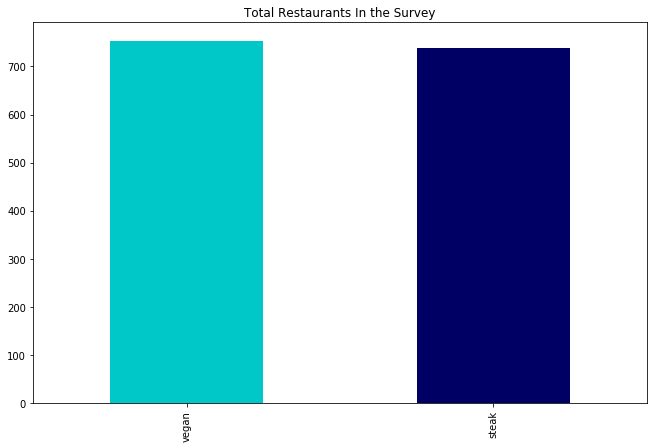

In [5]:
plt.figure(figsize=(11,7))
total_counts = df.category.value_counts().plot(kind='bar', color=('#00C8C8','#000064'))
plt.title('Total Restaurants In the Survey')

# vegan_color = '#00ACAD'
# steak_color = '#00C8C8'

# Summary Analysis

We create a new DataFrame with just summary statistics to allow us to see quick comparisons by city.

### Population of matching 40km radius

In [6]:
pop = {'Portland':1907395, 
'Los Angeles':10055380, 
'New York City':13409590, 
'Boston':3342667, 
'Chicago':6377851, 
'Austin':1142575, 
'Miami':3140501, 
'Tulsa':757571, 
'Minneapolis':2648228, 
'San Diego':2684215,
'san francisco': 5027241}

In [7]:
# creating a new dataframed named cities_df
cities = ['portland','los angeles','new york','boston','chicago','austin','miami','tulsa','minneapolis','san diego','san francisco']


In [8]:
def get_number_of_restaurants(city,restaurant_type):
    return df.loc[(df['city'] == city) & (df['category'] == restaurant_type)].shape[0]

In [9]:
# create a function that sums price per city per category: vegan, steak
def get_sum(city,restaurant_type):
    return df.loc[(df['city'] == city) & (df['category'] == restaurant_type)].price.sum()

In [10]:
cities_df = pd.DataFrame({'city':cities},)

#adding vegan_count column to cities_df dataframe
cities_df['veg_count'] = cities_df['city'].map(lambda x :get_number_of_restaurants(x,'vegan') )

#adding steak_count column to cities_df dataframe
cities_df['steak_count'] = cities_df['city'].map(lambda x :get_number_of_restaurants(x,'steak') )

# adding a population column to cities_df dataframe
cities_df['pop'] = [float(x) for x in list(pop.values())]

# adding a per capita column to cities_df dataframe to give steak restaurants per capita per city
cities_df['steak_capita'] = cities_df['steak_count'] / cities_df['pop']
cities_df['veg_capita'] = cities_df['veg_count'] / cities_df['pop']

cities_df['steak_rating_mean'] = cities_df['city'].map(lambda x :get_sum(x,'steak') )/cities_df['steak_count']
cities_df['veg_rating_mean'] = cities_df['city'].map(lambda x :get_sum(x,'vegan') )/ cities_df['veg_count']

# adding price sum column per city for steak restaurants
cities_df['steak_$mean'] = cities_df['city'].map(lambda x :get_sum(x,'steak') )/ cities_df['steak_count']
cities_df['veg_$mean'] = cities_df['city'].map(lambda x :get_sum(x,'vegan') )/ cities_df['veg_count']


# adding longitude and latitude to cities_df dataframe


#setting the index to the city
cities_df.set_index('city', drop=True, inplace=True)

In [11]:
cities_df

,veg_count,steak_count,pop,steak_capita,veg_capita,steak_rating_mean,veg_rating_mean,steak_$mean,veg_$mean
city,,,,,,,,,
portland,102,30,1907395.0,0.000016,0.000053,2.551724,1.505747,2.551724,1.505747
los angeles,137,68,10055380.0,0.000007,0.000014,2.758065,1.678261,2.758065,1.678261
new york,238,243,13409590.0,0.000018,0.000018,2.853333,1.905941,2.853333,1.905941
boston,36,47,3342667.0,0.000014,0.000011,2.613636,1.750000,2.613636,1.750000
chicago,56,97,6377851.0,0.000015,0.000009,2.802198,1.607843,2.802198,1.607843
austin,53,31,1142575.0,0.000027,0.000046,2.700000,1.534884,2.700000,1.534884
miami,32,73,3140501.0,0.000023,0.000010,2.303030,1.720000,2.303030,1.720000
tulsa,5,33,757571.0,0.000044,0.000007,2.366667,1.333333,2.366667,1.333333
minneapolis,16,27,2648228.0,0.000010,0.000006,2.680000,1.727273,2.680000,1.727273


### Save summary statistics for future use

In [ ]:
cities_df.to_csv('summary.csv')

## Build Histograms and Distributions

In [12]:
start_point={'new york':(40.70544486444615, -73.99429321289062),
'chicago':(41.90515925618311, -87.67776489257812),
'portland':(45.515785397030584, -122.65411376953125),
'san francisco':(37.76089938976322, -122.43644714355469),
'los angeles':(34.0615895441259, -118.32138061523438),
'boston':(42.34784169448538, -71.07124328613281),
'austin':(30.305156315977833, -97.75772094726562),
'miami':(25.752753731496888, -80.2880859375),
'san diego':(32.790569394537286, -117.15408325195312),
'tulsa':(36.10220015729658, -95.9271240234375),
'minneapolis':(44.96558443188442, -93.2904052734375)}

In [13]:
tot1 = df[df['category']=='vegan']['price']  
tot2 = df[df['category']=='steak']['price']  

# Group data together
hist_data = [tot1, tot2]

group_labels = ['Vegan Price','Steak Price']

colors = ['rgb(0, 172, 173)', 'rgb(0, 000, 100)']
# Create distplot with custom bin_size
tot_fig1 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors,show_hist=False, curve_type='normal', show_rug=False)

tot_fig1['layout'].update(title='Price Distribution Across 11 Cities')
# Plot!
plotly.offline.iplot(tot_fig1, filename='Distplot with Multiple Datasets')

In [14]:
tot3 = df[df['category']=='vegan']['rating']  
tot4 = df[df['category']=='steak']['rating']  

# Group data together
hist_data = [tot3, tot4]

group_labels = ['Vegan Rating', 'Steak Rating']

colors = ['rgb(0, 172, 173)', 'rgb(0, 00, 100)']
# Create distplot with custom bin_size
tot_fig2 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors,show_hist=False, curve_type='normal', show_rug=False)

tot_fig2['layout'].update(title='Rating Distribution Across 11 Cities')
# Plot!
plotly.offline.iplot(tot_fig2, filename='Distplot with Multiple Datasets')

In [15]:
tot_kde1 = df[df['category']=='vegan']['price']  
tot_kde2 = df[df['category']=='steak']['price']  

# Group data together
hist_data = [tot_kde1, tot_kde2]

group_labels = ['Vegan Price', 'Steak Price']

colors = ['rgb(0, 172, 173)', 'rgb(0, 00, 100)']
# Create distplot with custom bin_size
total_kde_fig1 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors,show_hist=False, curve_type='kde', show_rug=False)

total_kde_fig1['layout'].update(title='Price Distribution Across 11 Cities')
# Plot!
plotly.offline.iplot(total_kde_fig1, filename='Distplot with Multiple Datasets')

In [16]:
tot_kde3 = df[df['category']=='vegan']['rating']  
tot_kde4 = df[df['category']=='steak']['rating']  

# Group data together
hist_data = [tot_kde3, tot_kde4]

group_labels = ['Vegan Rating', 'Steak Rating']

colors = ['rgb(0, 172, 173)', 'rgb(0, 00, 100)']
# Create distplot with custom bin_size
total_kde_fig2 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors,show_hist=False, curve_type='kde', show_rug=False)

total_kde_fig2['layout'].update(title='Rating Distribution Across 11 Cities')
# Plot!
plotly.offline.iplot(total_kde_fig2, filename='Distplot with Multiple Datasets')

## Additional code for distribution plots by city

In [ ]:
nyc1 = df[(df['city']=='new york')&(df['category']=='vegan')]['price']  
nyc2 = df[(df['city']=='new york')&(df['category']=='steak')]['price']  
hist_data = [chi1, chi2]

group_labels = ['Vegan Price', 'Steak Price']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
nyc_fig1 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
nyc_fig1['layout'].update(title='New York City Price Distribution')

plotly.offline.iplot(nyc_fig1, filename='Distplot with Multiple Datasets')

In [ ]:

nyc3 = df[(df['city']=='new york')&(df['category']=='vegan')]['rating']  
nyc4 = df[(df['city']=='new york')&(df['category']=='steak')]['rating'] 
hist_data = [nyc3, nyc4]

group_labels = ['Vegan Rating', 'Steak Rating']

colors = [ 'rgb(00, 172, 173)','rgb(0, 0, 100)']
nyc_fig2 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
nyc_fig2['layout'].update(title='New York City Ratings Distribution')
plotly.offline.iplot(nyc_fig2, filename='Distplot with Multiple Datasets')

In [ ]:
tul1 = df[(df['city']=='tulsa')&(df['category']=='vegan')]['price']  
tul2 = df[(df['city']=='tulsa')&(df['category']=='steak')]['price']  
hist_data = [tul1, tul2]

group_labels = ['Vegan Price', 'Steak Price']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
tul_fig1 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
tul_fig1['layout'].update(title='Tulsa Price Distribution')

plotly.offline.iplot(tul_fig1, filename='Distplot with Multiple Datasets')

In [ ]:
tul3 = df[(df['city']=='tulsa')&(df['category']=='vegan')]['rating']  
tul4 = df[(df['city']=='tulsa')&(df['category']=='steak')]['rating']  
hist_data = [tul3, tul4]

group_labels = ['Vegan Rating', 'Steak Rating']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
tul_fig2 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
tul_fig2['layout'].update(title='Tulsa Rating Distribution')

plotly.offline.iplot(tul_fig2, filename='Distplot with Multiple Datasets')

In [ ]:
pdx1 = df[(df['city']=='portland')&(df['category']=='vegan')]['price']  
pdx2 = df[(df['city']=='portland')&(df['category']=='steak')]['price']  
hist_data = [pdx1, pdx2]

group_labels = ['Vegan Price', 'Steak Price']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
pdx_fig1 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
pdx_fig1['layout'].update(title='Portland Price Distribution')

plotly.offline.iplot(pdx_fig1, filename='Distplot with Multiple Datasets')

In [ ]:
pdx3 = df[(df['city']=='portland')&(df['category']=='vegan')]['rating']  
pdx4 = df[(df['city']=='portland')&(df['category']=='steak')]['rating']  
hist_data = [pdx3, pdx4]

group_labels = ['Vegan Rating', 'Steak Rating']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
pdx_fig2 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
pdx_fig2['layout'].update(title='Portland Rating Distribution')

plotly.offline.iplot(pdx_fig2, filename='Distplot with Multiple Datasets')


In [ ]:
atx1 = df[(df['city']=='austin')&(df['category']=='vegan')]['price']  
atx2 = df[(df['city']=='austin')&(df['category']=='steak')]['price']  
hist_data = [atx1, atx2]

group_labels = ['Vegan Price', 'Steak Price']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
pdx_fig1 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
pdx_fig1['layout'].update(title='Austin Price Distribution')

plotly.offline.iplot(pdx_fig1, filename='Distplot with Multiple Datasets')

In [ ]:
atx3 = df[(df['city']=='austin')&(df['category']=='vegan')]['rating']  
atx4 = df[(df['city']=='austin')&(df['category']=='steak')]['rating']  
hist_data = [atx3, atx4]

group_labels = ['Vegan Rating', 'Steak Rating']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
atx_fig2 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
atx_fig2['layout'].update(title='Austin Rating Distribution')

plotly.offline.iplot(atx_fig2, filename='Distplot with Multiple Datasets')

In [ ]:
lax1 = df[(df['city']=='los angeles')&(df['category']=='vegan')]['price']  
lax2 = df[(df['city']=='los angeles')&(df['category']=='steak')]['price']  
hist_data = [lax1, lax2]

group_labels = ['Vegan Rating', 'Steak Rating']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
atx_fig2 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
atx_fig2['layout'].update(title='Los Angeles Price Distribution')

plotly.offline.iplot(atx_fig2, filename='Distplot with Multiple Datasets')

In [ ]:
lax3 = df[(df['city']=='los angeles')&(df['category']=='vegan')]['rating']  
lax4 = df[(df['city']=='los angeles')&(df['category']=='steak')]['rating']  
hist_data = [lax3, lax4]

group_labels = ['Vegan Rating', 'Steak Rating']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
atx_fig2 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
atx_fig2['layout'].update(title='Los Angeles Rating Distribution')

plotly.offline.iplot(atx_fig2, filename='Distplot with Multiple Datasets')

In [ ]:
bos1 = df[(df['city']=='boston')&(df['category']=='vegan')]['price']  
bos2 = df[(df['city']=='boston')&(df['category']=='steak')]['price']  
hist_data = [bos1, bos2]

group_labels = ['Vegan Rating', 'Steak Rating']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
atx_fig2 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
atx_fig2['layout'].update(title='Boston Price Distribution')

plotly.offline.iplot(atx_fig2, filename='Distplot with Multiple Datasets')

In [ ]:
bos3 = df[(df['city']=='boston')&(df['category']=='vegan')]['rating']  
bos4 = df[(df['city']=='boston')&(df['category']=='steak')]['rating']  
hist_data = [bos3, bos4]

group_labels = ['Vegan Rating', 'Steak Rating']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
atx_fig2 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
atx_fig2['layout'].update(title='Boston Rating Distribution')

plotly.offline.iplot(atx_fig2, filename='Distplot with Multiple Datasets')

In [ ]:
chi1 = df[(df['city']=='chicago')&(df['category']=='vegan')]['price']  
chi2 = df[(df['city']=='chicago')&(df['category']=='steak')]['price']  
hist_data = [chi1, chi2]

group_labels = ['Vegan Rating', 'Steak Rating']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
atx_fig2 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
atx_fig2['layout'].update(title='Chicago Price Distribution')

plotly.offline.iplot(atx_fig2, filename='Distplot with Multiple Datasets')

In [ ]:
chi3 = df[(df['city']=='chicago')&(df['category']=='vegan')]['rating']  
chi4 = df[(df['city']=='chicago')&(df['category']=='steak')]['rating']  
hist_data = [chi3, chi4]

group_labels = ['Vegan Rating', 'Steak Rating']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
atx_fig2 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
atx_fig2['layout'].update(title='Chicago Rating Distribution')

plotly.offline.iplot(atx_fig2, filename='Distplot with Multiple Datasets')

In [ ]:
mia1 = df[(df['city']=='miami')&(df['category']=='vegan')]['price']  
mia2 = df[(df['city']=='miami')&(df['category']=='steak')]['price']  
hist_data = [mia1, mia2]

group_labels = ['Vegan Rating', 'Steak Rating']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
atx_fig2 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
atx_fig2['layout'].update(title='Miami Price Distribution')

plotly.offline.iplot(atx_fig2, filename='Distplot with Multiple Datasets')

In [ ]:
mia3 = df[(df['city']=='miami')&(df['category']=='vegan')]['rating']  
mia4 = df[(df['city']=='miami')&(df['category']=='steak')]['rating']  
hist_data = [mia3, mia4]

group_labels = ['Vegan Rating', 'Steak Rating']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
atx_fig2 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
atx_fig2['layout'].update(title='Miami Rating Distribution')

plotly.offline.iplot(atx_fig2, filename='Distplot with Multiple Datasets')

In [ ]:
msp1 = df[(df['city']=='minneapolis')&(df['category']=='vegan')]['price']  
msp2 = df[(df['city']=='minneapolis')&(df['category']=='steak')]['price']  
hist_data = [msp1, msp2]

group_labels = ['Vegan Rating', 'Steak Rating']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
atx_fig2 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
atx_fig2['layout'].update(title='Minneapolis Price Distribution')

plotly.offline.iplot(atx_fig2, filename='Distplot with Multiple Datasets')

In [ ]:
msp3 = df[(df['city']=='minneapolis')&(df['category']=='vegan')]['rating']  
msp4 = df[(df['city']=='minneapolis')&(df['category']=='steak')]['rating']  
hist_data = [msp3, msp4]

group_labels = ['Vegan Rating', 'Steak Rating']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
atx_fig2 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
atx_fig2['layout'].update(title='Minneapolis Rating Distribution')

plotly.offline.iplot(atx_fig2, filename='Distplot with Multiple Datasets')

In [ ]:
snd1 = df[(df['city']=='san diego')&(df['category']=='vegan')]['price']  
snd2 = df[(df['city']=='san diego')&(df['category']=='steak')]['price']  
hist_data = [snd1, snd2]

group_labels = ['Vegan Rating', 'Steak Rating']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
atx_fig2 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
atx_fig2['layout'].update(title='San Diego Price Distribution')

plotly.offline.iplot(atx_fig2, filename='Distplot with Multiple Datasets')

In [ ]:
snd3 = df[(df['city']=='san diego')&(df['category']=='vegan')]['rating']  
snd4 = df[(df['city']=='san diego')&(df['category']=='steak')]['rating']  
hist_data = [snd3, snd4]

group_labels = ['Vegan Rating', 'Steak Rating']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
atx_fig2 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
atx_fig2['layout'].update(title='San Diego Rating Distribution')

plotly.offline.iplot(atx_fig2, filename='Distplot with Multiple Datasets')

In [ ]:
sfo1 = df[(df['city']=='san francisco')&(df['category']=='vegan')]['price']  
sfo2 = df[(df['city']=='san francisco')&(df['category']=='steak')]['price']  
hist_data = [sfo1, sfo2]

group_labels = ['Vegan Rating', 'Steak Rating']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
atx_fig2 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
atx_fig2['layout'].update(title='san francisco Price Distribution')

plotly.offline.iplot(atx_fig2, filename='Distplot with Multiple Datasets')

In [ ]:
sfo3 = df[(df['city']=='san francisco')&(df['category']=='vegan')]['rating']  
sfo4 = df[(df['city']=='san francisco')&(df['category']=='steak')]['rating']  
hist_data = [sfo3, sfo4]

group_labels = ['Vegan Rating', 'Steak Rating']

colors = ['rgb(0,172, 173)', 'rgb(0, 0, 100)']
atx_fig2 = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors, show_hist=False, curve_type='normal', show_rug=False)
atx_fig2['layout'].update(title='San Francisco Rating Distribution')

plotly.offline.iplot(atx_fig2, filename='Distplot with Multiple Datasets')

### Population list:

In [ ]:
pop = {'Portland':1907395, 
'Los Angeles':10055380, 
'New York City':13409590, 
'Boston':3342667, 
'Chicago':6377851, 
'Austin':1142575, 
'miami':3140501, 
'tulsa':757571, 
'Minneapolis':2648228, 
'San Diego':2684215}